In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.stats as sis
import statsmodels.tsa.stattools as sta
import pandas as pd
import os

In [12]:
ruta='signals.mat'
data=sio.loadmat(ruta)
data_ecg=data['ECG_asRecording'][0]
siz=np.size(data_ecg)
freq=1024
tiempo=siz/freq
t=np.arange(0,tiempo,1/freq)

# **CÁLCULO DEL TIEMPO.**

### Para calcular el tiempo, primero cargamos de uno de los archivos (en este caso es ECG Recording) el elemento con los datos que necesitamos, el cual está en la primera posición. Luego de cargar el archivo usamos la función size de la librería numpy para saber sus dimenciones. Seguido de esto dividimos dicho valor entre la frecuencia dada (1024 Hz). Con estos datos ya podemos crear un vector tiempo de la forma [Dato_inicial,Dato Final,Step] definiendo el step como 1/Frecuencia.

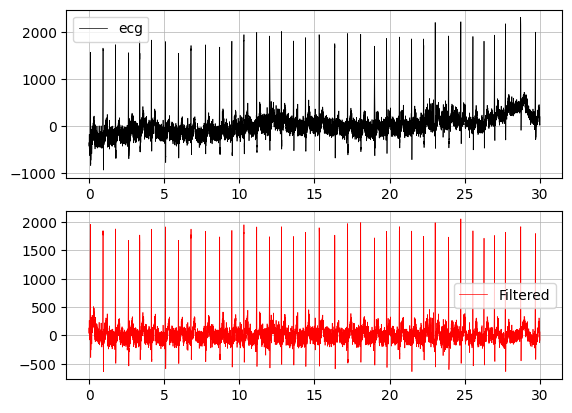

Valor Máximo ECG: 2315.51220703125
Valor Mínimo ECG: -929.524658203125
Valor Máximo Filtered: 2052.404721502409
Valor Mínimo Filtered: -636.618811062997


In [13]:
ruta='signals.mat'
data=sio.loadmat(ruta)
ecg=data['ECG_asRecording'][0]
ecg=ecg-np.median(ecg)
filt=data['ECG_filtered'][0]
filt=filt-np.median(filt)
fig,axs=plt.subplots(2)
axs[0].plot(t,ecg, color='k',label='ecg',lw=0.5)
axs[0].grid(True,lw=0.5)
axs[0].legend()
axs[1].plot(t,filt, color='r',label='Filtered',lw=0.5)
axs[1].grid(True,lw=0.5)
axs[1].legend()
plt.show()
print('Valor Máximo ECG: '+str(np.max(ecg)))
print('Valor Mínimo ECG: '+str(np.min(ecg)))
print('Valor Máximo Filtered: '+str(np.max(filt)))
print('Valor Mínimo Filtered: '+str(np.min(filt)))


#  **ANÁLISIS**

### Podemos apreciar que la señal fue atenuada, esto se evidencia en la reducción en los valores de los datos, además de una leve linealización, ya que en la primera gráfica (señal normal), los datos generan una leve curva en incremento, mientras que en la segunda gráfica (señal filtrada) se ven más estables respecto al 0.

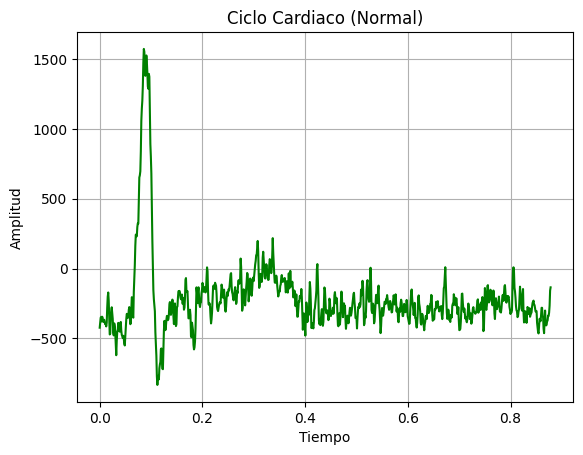

Promedio: -216.8295144314236
Valor RMS: 356.5717026089397
Varianza: 80128.34077287118
Desviación Estándar: 283.0694981322982


In [14]:
inicio_ciclo=0  # Muestra inicial del ciclo
fin_ciclo=900   # Muestra final del ciclo
c_cardiaco=ecg[inicio_ciclo:fin_ciclo]
t2=t[inicio_ciclo:fin_ciclo]
plt.plot(t2,c_cardiaco,color='g')
plt.title('Ciclo Cardiaco (Normal)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()
prom=np.mean(c_cardiaco)
rms=np.sqrt(np.mean(c_cardiaco**2))
vari=np.var(c_cardiaco)
dev_estandar=np.std(c_cardiaco)
print('Promedio:', prom)
print('Valor RMS:', rms)
print('Varianza:', vari)
print('Desviación Estándar:', dev_estandar)

# **ANÁLISIS**

### La señal muestra un ciclo cardiaco del sujeto de prueba, el cual fue tomado desde el inicio de la onda P hasta el inicio de la próxima onda P, evidenciando un periodo aproximado de 0,85 segundos y una frecuencia cardiaca de aproximadamente 71 lpm, lo cual es un valor normal para una persona en reposo. Se logra visualizar el complejo QRS (pico máximo de la señal) entre 0 y 0,2 segundos y el valle generado en la onda T, posterior al QRS.

### No se evidencian arritmias o excitaciones anormales en los complejos de la señal, por lo que aparentemente el sujeto de prueba es un sujeto sano.

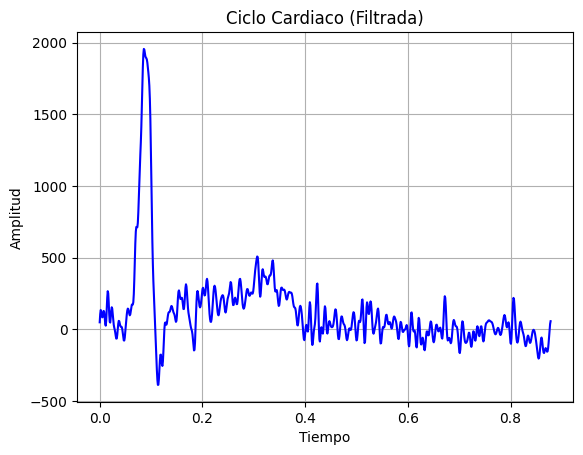

Promedio: 124.03157801627789
Valor RMS: 328.0268346848767
Varianza: 92217.77192817138
Desviación Estándar: 303.67379196791313


In [15]:
inicio_ciclo=0  # Muestra inicial del ciclo
fin_ciclo=900   # Muestra final del ciclo
c_cardiaco=filt[inicio_ciclo:fin_ciclo]
t2=t[inicio_ciclo:fin_ciclo]
plt.plot(t2,c_cardiaco,color='b')
plt.title('Ciclo Cardiaco (Filtrada)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()
prom=np.mean(c_cardiaco)
rms=np.sqrt(np.mean(c_cardiaco**2))
vari=np.var(c_cardiaco)
dev_estandar=np.std(c_cardiaco)
print('Promedio:', prom)
print('Valor RMS:', rms)
print('Varianza:', vari)
print('Desviación Estándar:', dev_estandar)

# **ANÁLISIS**

### El proceso de filtrado hace que la señal se estabilice con respecto al 0, haciendo que su trazado se haga con respecto a esta línea, facilitando la lectura de los picos.  Por otra parte, el valor RMS y la desviación estándar no sufren mayor cambio con respecto a la señal original, mostrando que el filtro no modifica el comportamiento de la señal, solo su valor de offset.

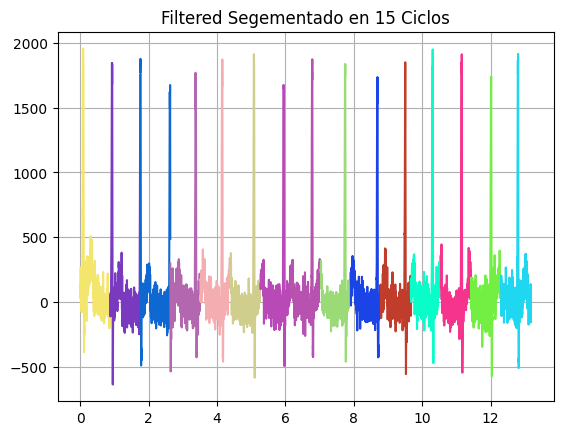

,Ciclo,Promedio,RMS,Varianza,Desviacion Estandar
0,1,124.031578,328.026835,92217.771928,303.673792
1,2,55.127603,328.377388,104792.656343,323.716939
2,3,59.319997,341.691977,113234.544776,336.503410
3,4,38.613655,276.784546,75118.670535,274.077855
4,5,78.785374,295.062826,80854.936109,284.350024
5,6,25.700771,290.081629,83486.821911,288.940862
6,7,47.659853,267.248742,69150.428520,262.964691
7,8,69.201890,290.317748,79495.493172,281.949451
8,9,27.245874,278.657579,76907.708593,277.322391
9,10,53.644295,272.444021,71348.034076,267.110528


In [16]:
inicio_fin=[0,900]   # Muestra
pas_ciclo=np.array([900,900])
dt_info=[]
for i in range(1,16):
    c_cardiaco=filt[inicio_fin[0]:inicio_fin[1]]
    t2=t[inicio_fin[0]:inicio_fin[1]]
    rgb=np.random.rand(1,3)
    plt.plot(t2,c_cardiaco,color=rgb)
    inicio_fin+=pas_ciclo
    prom=np.mean(c_cardiaco)
    rms=np.sqrt(np.mean(c_cardiaco**2))
    vari=np.var(c_cardiaco)
    dev_estandar=np.std(c_cardiaco)
    informacion={'Ciclo':i,'Promedio':prom,'RMS':rms,'Varianza':vari,\
                 'Desviacion Estandar':dev_estandar}
    dt_info.append(informacion)
plt.grid(True)
plt.title('Filtered Segementado en 15 Ciclos')
plt.show()
dt=pd.DataFrame(dt_info)
display(dt)



# **ANÁLISIS**

### Ya que los valores del promedio y la desviación estándar (a su vez la varianza) tienen una oscilación considerable, no es posible considerar que la señal sea estacionaria. Estas variaciones no dejan posibilidad de considerar un pequeño margen de error.

In [17]:
c1=filt[0:900]
t1=t[0:900]
shap_c1=sis.shapiro(c1)
c2=filt[900:1800]
t2=t[900:1800]
shap_c2=sis.shapiro(c2)
levene=sis.levene(c1,c2)
prueba_t=sis.ttest_ind(c1,c2)
# print('El valor de significancia para el Ciclo 1 es: ',shap_c1[1])
# print('El valor de significancia para el Ciclo 2 es: ',shap_c2[1])
# print('Prueba de Levene para Homocedasticidad: ',levene[1])
# print('Prueba t: ',prueba_t[1])
info={'Sig. Ciclo 1':str(shap_c1[1]),'Sig. Ciclo 2':str(shap_c2[1]),\
      'Levene':str(levene[1]),'Prueba t':str(prueba_t[1])}
df2=pd.DataFrame.from_dict(info, orient='index', columns=['Valor'])
display(df2)


,Valor
Sig. Ciclo 1,1.3772654558242552e-40
Sig. Ciclo 2,6.13462151953503e-42
Levene,0.6190124638592787
Prueba t,3.484186577200757e-06


# **ANÁLISIS**
### Se hicieron todas las pruebas correspondientes, al final los valores dan menos de 0,05 (valor nominal) por lo que recurriremos a la prueba no paramétrica U de Mann-Whitney.

In [18]:
p_value_mw=sis.mannwhitneyu(c1,c2)
print('Prueba U de Mann-Whitney:',p_value_mw[1])

Prueba U de Mann-Whitney: 3.798014676991839e-28


# **ANÁLISIS**
### El valor obtenido en la prueba U de Mann Whitney es del orden de 10^-28, al ser tan bajo (aproximadamente 0) se rechaza la hipótesis nula [los datos no tienen diferencia significativa] y se acepta la hipótesis alternativa, que indica que los datos sí tienen diferencia significativa entre sí.

### Por último se pide realizar la prueba Dick-Fuller

In [19]:
r_c1=sta.adfuller(c1)
r_c2=sta.adfuller(c2)
print('Ciclo 1:',r_c1[1])
print('Ciclo 2:',r_c2[1])

Ciclo 1: 0.4491334584813818
Ciclo 2: 0.8170230468801083


# **ANÁLISIS**
### Para los dos ciclos analizados, el valor obtenido con la prueba de Dickey - Fuller es mayor al nivel de significancia arbitrario (0,05), con lo cual se reafirma lo mencionado anteriormente acerca de que la señal no es estacionaria.